In [2]:
! pip install pandas numpy


import pandas as pd
import numpy as np

import os

In [3]:
SEEDS = ['actor', 
         'amusement_park', 
         'band', 
         'championship', 
         'chemical_element', 
         'company', 
         'comune', 
         'dialect', 
         'film', 
         'scientist', 
         'sculpture', 
         'university', 
         'vehicle', 
         'video_game']


SIZES = [2,3,4,5,6]

In [4]:
new_core_real_time = None

print(os.listdir('../pyrunlim_output_false_true'))

for seed in SEEDS:
    for size in SIZES:
        _tmp = pd.read_csv(f'../pyrunlim_output_false_true/{seed}/{size}.csv', sep=';')
        if new_core_real_time is None:
            new_core_real_time = _tmp
        else:
            new_core_real_time = pd.concat([new_core_real_time, _tmp])

print(new_core_real_time.columns)
print(new_core_real_time.shape)

# drop the Unnamed: 20 column
#new_core_real_time = new_core_real_time.drop('Unnamed: 20', axis=1)

print(new_core_real_time.columns)
print(new_core_real_time.shape)


print(new_core_real_time.head())


['vehicle', 'comune', 'script.sh', 'university', 'dialect', 'sculpture', 'amusement_park', 'film', 'video_game', 'scientist', 'chemical_element', 'company', 'championship', 'actor', 'band']
Index(['UNIT', 'SEED', 'SIZE', 'TILDE', 'NEW', 'REALTIME', 'CHARACTERIZATION'], dtype='object')
(700000, 7)
Index(['UNIT', 'SEED', 'SIZE', 'TILDE', 'NEW', 'REALTIME', 'CHARACTERIZATION'], dtype='object')
(700000, 7)
                        UNIT   SEED  SIZE  TILDE   NEW  REALTIME  \
0  bn:00915979n,bn:02426205n  actor     2  False  True     0.666   
1  bn:15939213n,bn:05144812n  actor     2  False  True     0.663   
2  bn:02688185n,bn:05472498n  actor     2  False  True     0.667   
3  bn:08476136n,bn:03875359n  actor     2  False  True     0.666   
4  bn:03340439n,bn:02366938n  actor     2  False  True     0.667   

                                    CHARACTERIZATION  
0  2[o     0.504] INSTANCE_OF(X, bn:00044571n), I...  
1  2[o     0.495] INSTANCE_OF(X, bn:03301234n), I...  
2  2[o     0.492] IN

In [9]:
# focus on the CHARACTERIZATION column

# for each row, i want to:
    # 1. Drop the first 15 characters
    # 2. Split the string by the comma
    # 3. Each element is in the form predicate(source, target)
    # 4. I want to extract the predicate and count how many times each predicate appears in each row

# for each available predicate name, i want to create a new column and count how many times the predicate appears in each row
# i want to apply this to each row of the CHARACTERIZATION column
# i want to create a new dataframe with the new columns


def extract_predicates(row):
    atms = row[15:].replace(' ','').split('),')
    prednames = [atm.split('(')[0] for atm in atms]
    return pd.Series(prednames).value_counts()


# i want to apply extract_predicates to each row of the CHARACTERIZATION column

_ndf = new_core_real_time['CHARACTERIZATION'].apply(extract_predicates)



ndf



NameError: name 'ndf' is not defined

In [10]:
_ndf = _ndf.fillna(0).astype(int)

In [11]:
_ndf

,INSTANCE_OF,OCCUPATION,GIVEN_NAME,COUNTRY_OF_CITIZENSHIP,PLACE_OF_BIRTH,EDUCATED_AT,NATIVE_LANGUAGE,PLACE_OF_DEATH,SPOUSE,AWARD_RECEIVED,...,DEVELOPER,PLATFORM,DISTRIBUTION,GAME_MODE,INPUT_DEVICE,SOFTWARE_ENGINE,DESIGNER,LICENSE,VOICE_ACTOR,PROGRAMMING_LANGUAGE
0,252,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,252,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,252,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,252,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,253,2,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,151,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,151,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9997,151,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,151,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# ndf to csv

_ndf.to_csv('predicate_distr.csv', sep=';')

In [15]:
# histogram of the predicates grouping "INSTANCE_OF" and all the other predicates

# create a column "OTHER_PREDICATES" that is the sum of all the other predicates

_ndf['***OTHER_PREDICATES***'] = _ndf.drop('INSTANCE_OF', axis=1).sum(axis=1)

98757516 1626182


<BarContainer object of 2 artists>

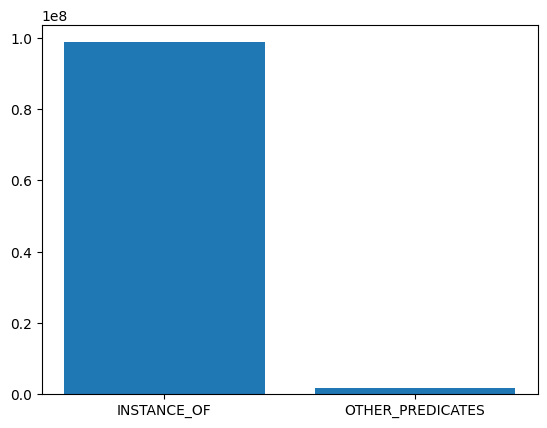

In [23]:
_iof = _ndf['INSTANCE_OF'].sum()

_others = _ndf['***OTHER_PREDICATES***'].sum()

print(_iof, _others)

# histogram

import matplotlib.pyplot as plt

plt.bar(['INSTANCE_OF', 'OTHER_PREDICATES'], [_iof, _others])

In [ ]:
import random

random.seed(42)

random_rows = random.sample(range(_ndf.shape[0]), 9)

print(random_rows)


import random

random_rows = random.sample(range(_ndf.shape[0]), 9)

for row in random_rows:
   

    






plt.show()


Index([6770, 6194, 8368, 8909, 6286, 7367, 3801, 3477, 7308], dtype='int64')
252 4
252 3
252 4
252 4
253 2
252 3
252 4
252 4
252 2


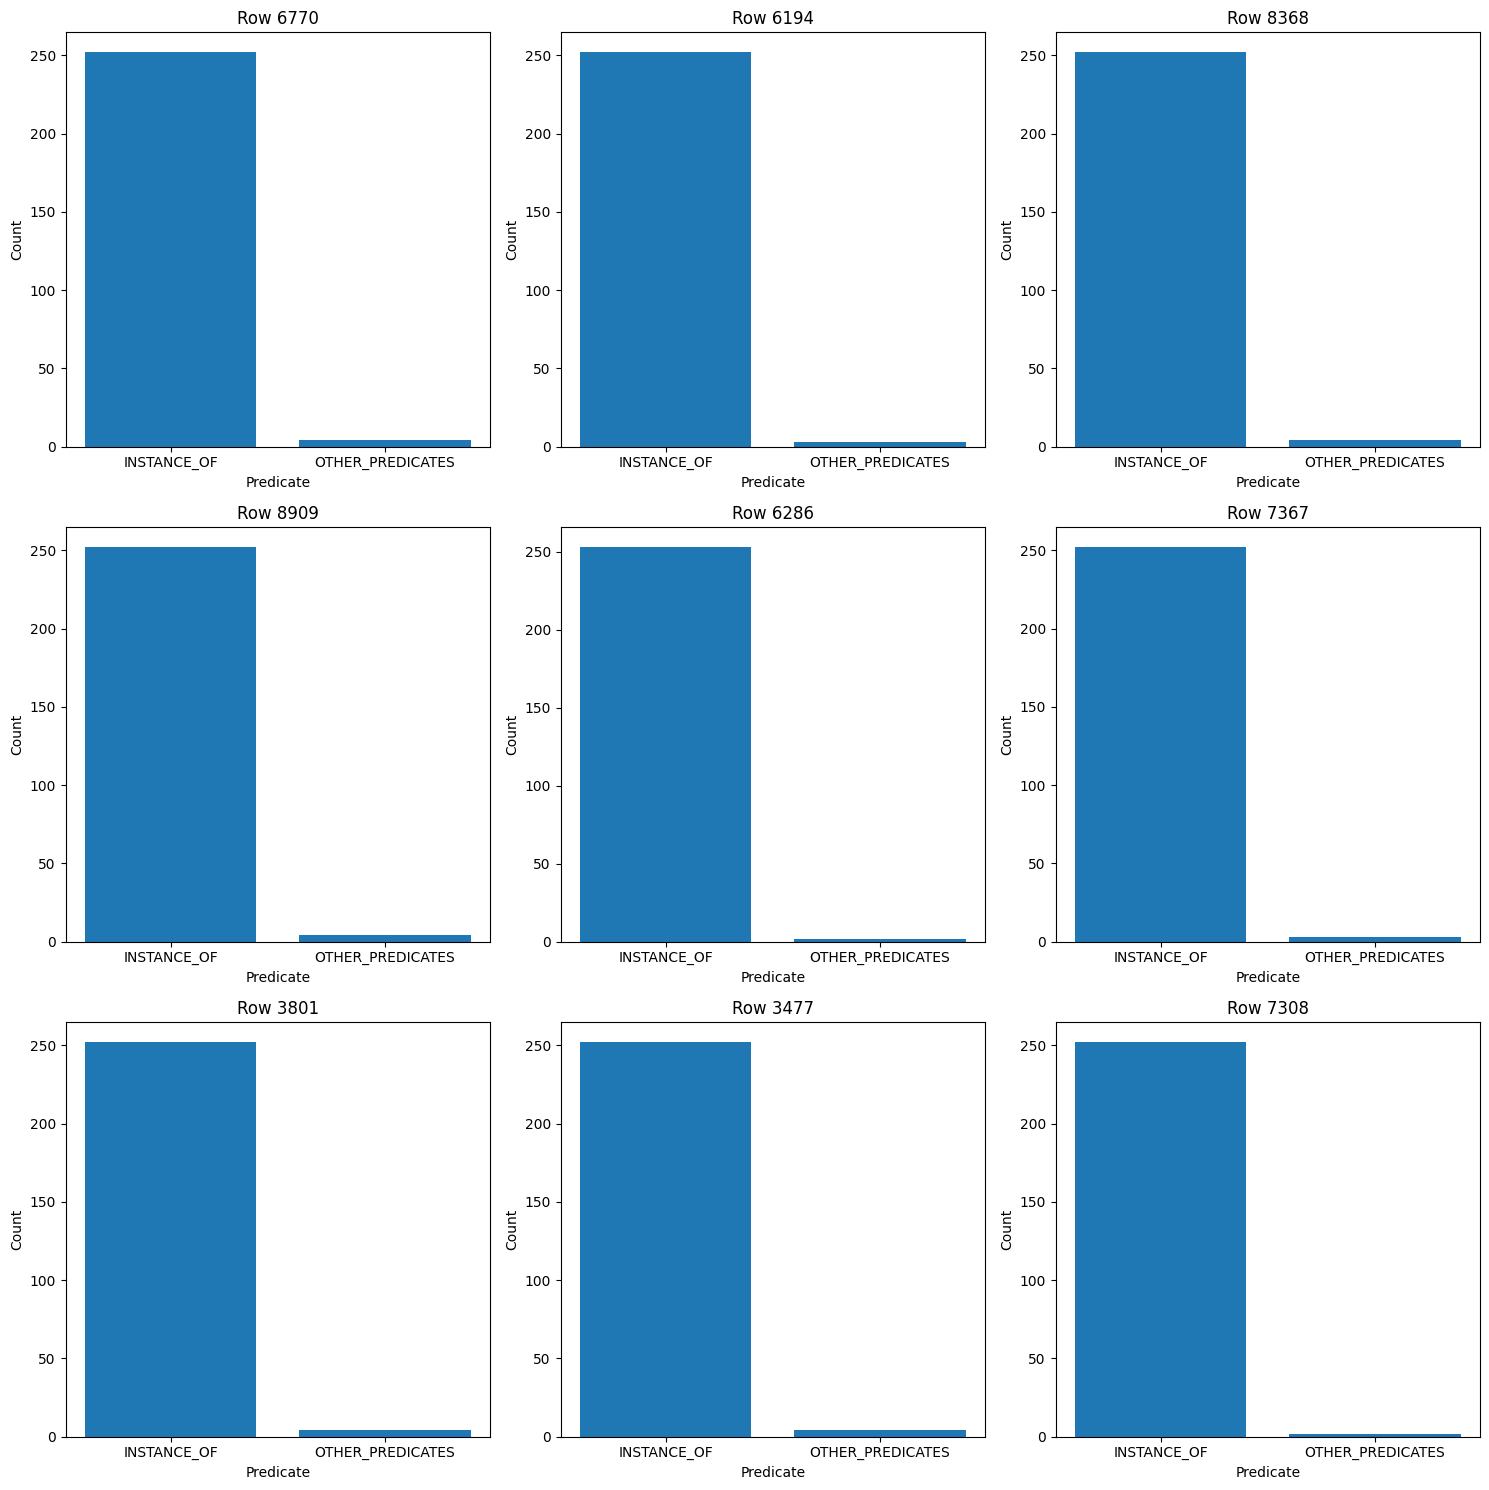

In [42]:
# take 9 random rows and plot 9 histograms of the predicates (instance_of and all the others summed)
# i want to plot 9 histograms in a 3x3 grid

import random

random.seed(42)

# instead of 9 random, i will take the 9 with the highest number of ***OTHER_PREDICATES***

random_rows = _ndf.sort_values('***OTHER_PREDICATES***', ascending=False).head(9).index

print(random_rows)

fig, axs = plt.subplots(3, 3, figsize=(15,15))

for i, row in enumerate(random_rows):
    _iof = _ndf.iloc[row].loc['INSTANCE_OF']
    _others = _ndf.iloc[row].loc['***OTHER_PREDICATES***']
    print(_iof, _others)
    # two different colors for the two bars

    axs[i//3, i%3].bar(['INSTANCE_OF', 'OTHER_PREDICATES'], [_iof, _others])
    axs[i//3, i%3].set_title(f'Row {row}')
    axs[i//3, i%3].set_xticks(['INSTANCE_OF', 'OTHER_PREDICATES'])
    axs[i//3, i%3].set_xticklabels(['INSTANCE_OF', 'OTHER_PREDICATES'])
    axs[i//3, i%3].set_xlabel('Predicate')
    axs[i//3, i%3].set_ylabel('Count')

plt.tight_layout()


plt.show()



In [44]:
# print row 6770

print(_ndf.iloc[6194])

INSTANCE_OF               252
OCCUPATION                  1
GIVEN_NAME                  0
COUNTRY_OF_CITIZENSHIP      1
PLACE_OF_BIRTH              1
                         ... 
DESIGNER                    0
LICENSE                     0
VOICE_ACTOR                 0
PROGRAMMING_LANGUAGE        0
***OTHER_PREDICATES***      3
Name: 6194, Length: 127, dtype: int64


In [46]:
# print the row 6770 of the original dataframe

print(new_core_real_time.iloc[6194]['CHARACTERIZATION'])

2[o     0.495] INSTANCE_OF(X, bn:00016845n), INSTANCE_OF(X, bn:03276533n), INSTANCE_OF(X, bn:00064608n), INSTANCE_OF(X, bn:00036821n), INSTANCE_OF(X, bn:01218451n), INSTANCE_OF(X, bn:01187738n), INSTANCE_OF(X, bn:03231728n), INSTANCE_OF(X, bn:00015962n), INSTANCE_OF(X, bn:15746231n), INSTANCE_OF(X, bn:00062164n), INSTANCE_OF(X, bn:00000492n), INSTANCE_OF(X, bn:00353575n), INSTANCE_OF(X, bn:00000005n), INSTANCE_OF(X, bn:00007068n), INSTANCE_OF(X, bn:00025333n), INSTANCE_OF(X, bn:02131709n), INSTANCE_OF(X, bn:00020457n), INSTANCE_OF(X, bn:00004257n), INSTANCE_OF(X, bn:03044714n), INSTANCE_OF(X, bn:00000318n), INSTANCE_OF(X, bn:02835051n), INSTANCE_OF(X, bn:00021222n), INSTANCE_OF(X, bn:00020452n), INSTANCE_OF(X, bn:16389892n), INSTANCE_OF(X, bn:00169525n), INSTANCE_OF(X, bn:00045632n), INSTANCE_OF(X, bn:00070697n), INSTANCE_OF(X, bn:05967837n), INSTANCE_OF(X, bn:00032896n), INSTANCE_OF(X, bn:00023542n), INSTANCE_OF(X, bn:00004222n), INSTANCE_OF(X, bn:01819597n), INSTANCE_OF(X, bn:0007052